# Gradient Descent

In [49]:
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Create Synthetic Data
We will generate synthetic data where the relationship between the feature $x$ and the target $y$ is linear. The underlying function is $y = 5x + 3$, and we will add some noise to simulate real-world data. The true slope ($m$) is 5, and the true intercept ($b$) is 3.


In [50]:
np.random.seed(42) # For reproducibility

x = np.random.rand(100) # Generate 100 random x values between 0 and 1

# y = 5x + 3 + some noise
y = 5 * x + 3 + np.random.randn(100) * 0.2 # Adding noise for realism

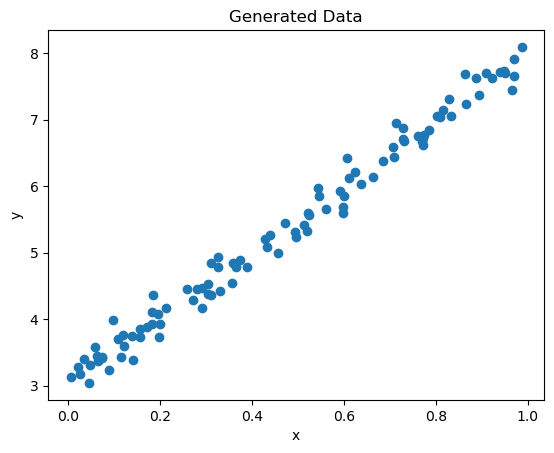

In [51]:
plt.scatter(x, y)
plt.title("Generated Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Step 2: Define the Cost Function

To fit a line to the data, we minimize the squared distance in the y-axis between each point (the real value) and the predicted value on the line. This is known as the Loss or Squared Error. Now we are going to create a random line:

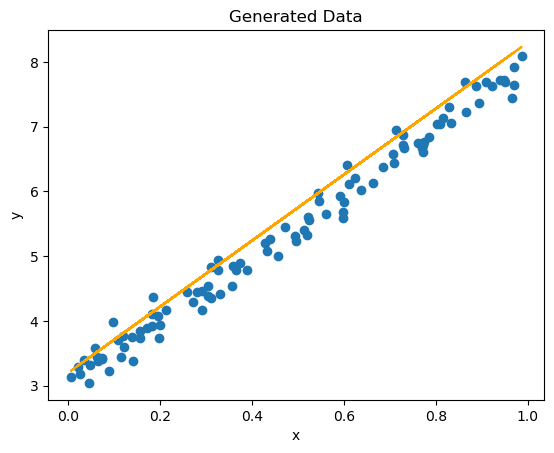

In [52]:
ramdom_y = 5.1 * x + 3.2 # A random line
plt.scatter(x, y)
plt.plot(x, ramdom_y, color="orange")
plt.title("Generated Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

The loss for a single point can be expressed as:

$$
(y_b - y_o)^2
$$

Where:

  - $y_b$​ is the actual (blue) point
  - $y_o$​ is the predicted (orange) point from the line

Substitute $y_o=mx_o+b$:

$$
(y_b - y_o)^2 => (y_b - (mx_o + b))^2 => (y - (mx + b))^2
$$

We found the Loss $(y - (mx + b))^2$ just for one point. However, we want the **Total Square Error**, so we add the Loss for the rest of the points:

$$
(y_1 - (mx_1 + b))^2 + (y_2 - (mx_2 + b))^2 + ... + (y_n - (mx_n + b))^2
$$
$$
\sum_{i=1}^{n} (y_i - (mx_i + b))^2
$$

Now we are going to create multiple lines with a given slope ($m=5.1$) and intercepts. Then we calculate the Total Square Error for each line and find the minimum TSE.

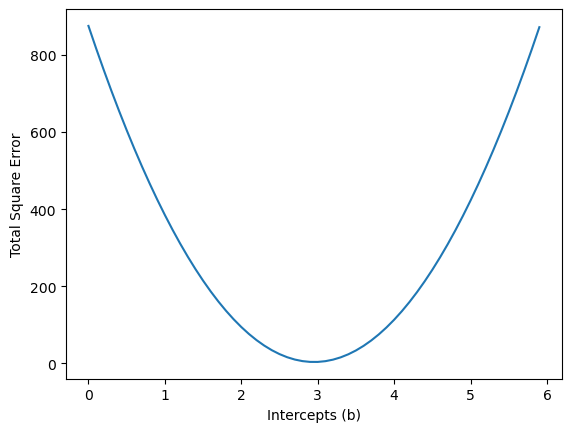

In [53]:
b_values = np.arange(0.0, 6.0, 0.1)
total_square_error = []
for b in b_values:
  tse = 0
  for index in range(len(y)):
    tse += ((y[index] - (5.1 * x[index] + b))**2)
  total_square_error.append(tse)

plt.plot(b_values, total_square_error)
plt.xlabel("Intercepts (b)")
plt.ylabel("Total Square Error")
plt.show()


From the plot we can confirm that the minimum Total Square Error occurs when $b=3$. However, there is a better way to find the minimum TSR which is with the derivative:
$$
TSE = \sum_{i=1}^{n} (y_i - (mx_i + b))^2
$$
$$
TSE'(b) = -2\sum_{i=1}^{n} (y_i - (mx_i + b))
$$

Instead of finding the Total Square Error (TSE), it is better to find the Mean Square Error (MSE) because $b$ would be influenced heavily by the size of the dataset. The more data points we have, the larger the sum becomes, which could make gradient descent very unstable (steps could be too large). By dividing by the number of points ($N$) we make sure the updates are normalized by the number of data points, making the learning process more stable regardless of the dataset size. Whether you have 10 or 10,000 data points, the learning rate ($α$) will control the step size in a more consistent way. Thus, to find the Mean Square Error it is required to divide by the total number or points ($N$).

$$
MSE = \frac{1}{N}\sum_{i=1}^{n} (y_i - (mx_i + b))^2
$$
$$
MSE'(b) = \frac{-2}{N}\sum_{i=1}^{n} y_i - (mx_i + b)
$$

So far we found the formula for the best intercept $b = \frac{-2}{N}\sum_{i=1}^{n} (y_i - (mx_i + b))$ with a random slope ($m=5.1$). However, we also want the best slope.

## Step 3: Gradient
Now we are going to create multiple lines again but using different slopes and intercepts. Then we will see the minimum MSE ($\frac{1}{N}\sum_{i=1}^{n} (y_i - (mx_i + b))^2$) and select the slope and intercept.

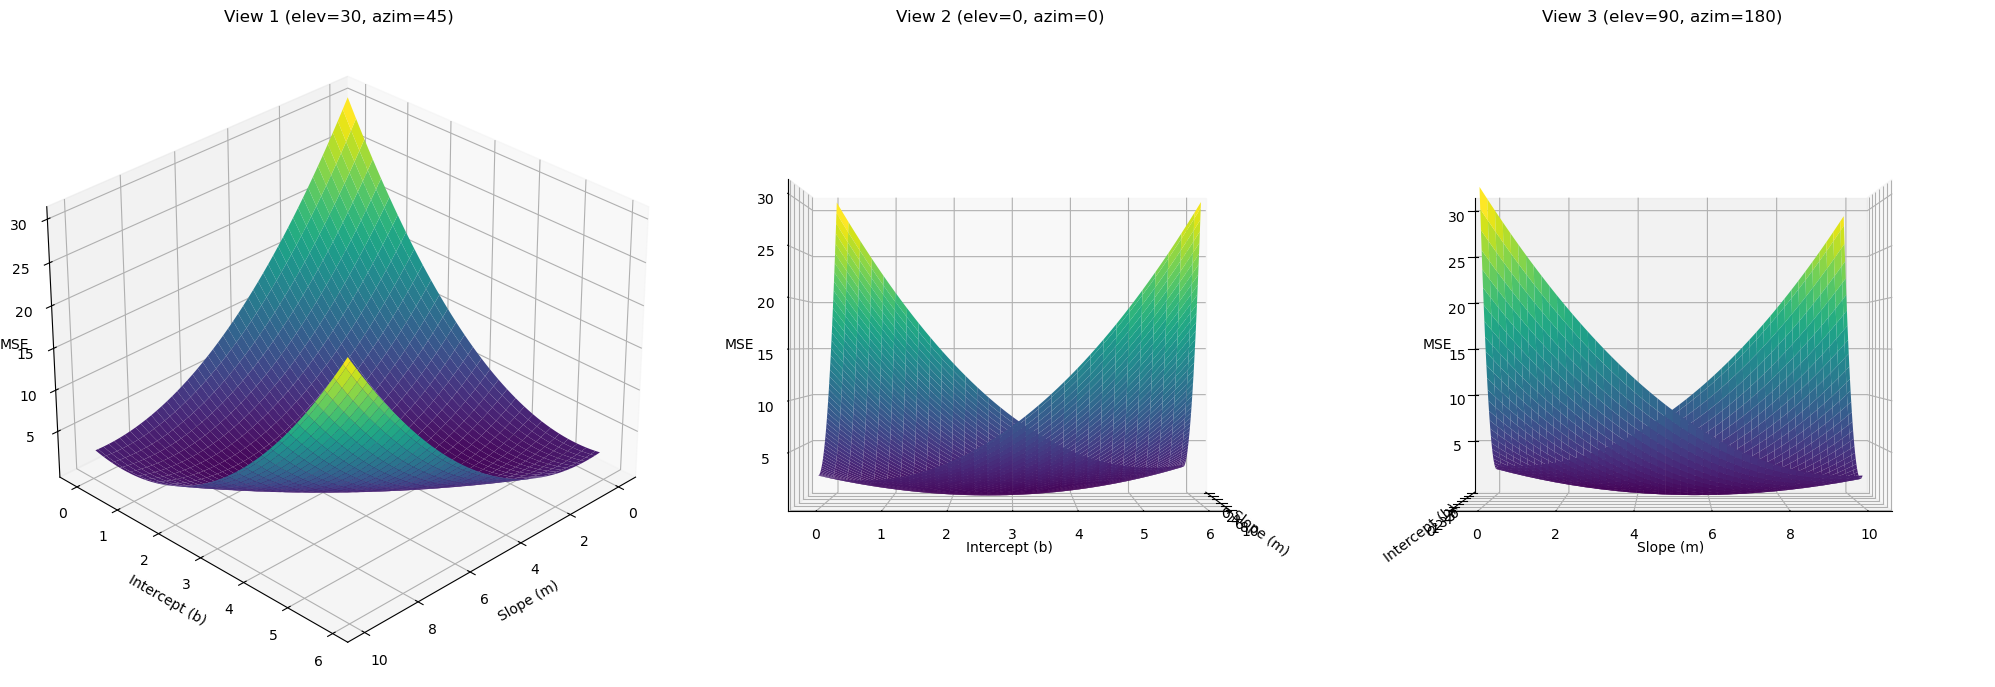

In [54]:
# Define ranges for m and b (slope and intercept)
b_values = np.arange(0.0, 6.0, 0.1)
m_values = np.arange(0.0, 10.0, 0.1)

# Create a meshgrid for m and b
m_grid, b_grid = np.meshgrid(m_values, b_values)

# Function to calculate Mean Squared Error (MSE)
def mse(m, b, x, y):
    N = len(x)
    return np.sum((y - (m * x + b)) ** 2) / N

# Calculate MSE for each combination of m and b
# Initialize a 2D array of the same shape as m_grid, but filled with zeros
z_grid = np.zeros_like(m_grid)
for i in range(m_grid.shape[0]):
    for j in range(m_grid.shape[1]):
        z_grid[i, j] = mse(m_grid[i, j], b_grid[i, j], x, y)

# Plot the 3D surface of MSE
fig = plt.figure(figsize=(20, 8))

# First view
plt.subplots_adjust(wspace=0.8)
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(m_grid, b_grid, z_grid, cmap='viridis')
ax1.set_title('View 1 (elev=30, azim=45)')
ax1.set_xlabel('Slope (m)')
ax1.set_ylabel('Intercept (b)')
ax1.set_zlabel('MSE', labelpad=-5)
ax1.view_init(elev=30, azim=45) 

# Second view
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(m_grid, b_grid, z_grid, cmap='viridis')
ax2.set_title('View 2 (elev=0, azim=0)')
ax2.set_xlabel('Slope (m)')
ax2.set_ylabel('Intercept (b)')
ax2.set_zlabel('MSE')
ax2.view_init(elev=0, azim=0)

# Third view
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(m_grid, b_grid, z_grid, cmap='viridis')
ax3.set_title('View 3 (elev=90, azim=180)')
ax3.set_xlabel('Slope (m)')
ax3.set_ylabel('Intercept (b)')
ax3.set_zlabel('MSE')
ax3.view_init(elev=0, azim=270)

# Show the plot
plt.subplots_adjust(wspace=0.8)
plt.tight_layout()
plt.show()

From the plots above we can confirm that the best intercept occurs when $b=3$ and $m=5$. We already knew this because $y$ was created from this line $y = 5x + 3$.

To avoid this tedious process we need to find the gradient $\nabla f(m, b)$ which is the derivative of $\frac{\partial f}{\partial m}$ and $\frac{\partial f}{\partial b}$.

$$
f(m, b) = \frac{1}{N}\sum_{i=1}^{n} (y_i - (mx_i + b))^2
$$

$$
\nabla f(m, b) = \begin{bmatrix}\frac{\partial f}{\partial m}, \frac{\partial f}{\partial b}\end{bmatrix}
$$

We already know:
$$
\frac{\partial f}{\partial b} = \frac{-2}{N}\sum_{i=1}^{n} y_i - (mx_i + b)
$$

So now we need to use the chain rule to calculate $\frac{\partial f}{\partial m}$:
$$
\frac{\partial f}{\partial m} = \frac{-2}{N}\sum_{i=1}^{n} x_i(y_i - (mx_i + b))
$$

Thus,
$$
\nabla f(m, b) = \frac{-2}{N} \sum_{i=1}^{N} \begin{bmatrix} x_i(y_i - (mx_i + b)) \\ y_i - (mx_i + b)\end{bmatrix}
$$

Let us write our gradients in python functions with the names **get_gradient_at_m** and **get_gradient_at_b** because we will need them:


In [55]:
def get_gradient_at_m(x, y, m, b):
  N = len(x)
  return (-2/N) * np.sum(x * (y - (m * x + b)))

def get_gradient_at_b(x, y ,m, b):
  N = len(x)
  return (-2/N) * np.sum(y - (m * x + b))

## Step 4: Gradient Descent Update Rule

The core idea of gradient descent is to move in the direction of the negative gradient. This is because the gradient is a vector that points in the direction of the steepest ascent of a multivariable function. (i.e., where the cost function increases the fastest), so moving in the opposite direction (negative gradient) will decrease the cost function and find the minimum Mean Square Error.

The general **update rule** for gradient descent is:

$$
\theta = \theta - \alpha \cdot \frac{\partial f}{\partial \theta}
$$

Where:
- $\theta$ represents the parameters of the model (in our case, $m$ and $b$).
- $α$ is the **learning rate**, which controls how large a step we take in the direction of the negative gradient.

For the parameter $m$ and $b$, the update rule becomes:
$$
m_{new} = m_{old} - α \cdot \frac{\partial f}{\partial m}
$$
$$
b_{new} = b_{old} - α \cdot \frac{\partial f}{\partial b}
$$

The **learning rate** $α$ is a key hyperparameter in the gradient descent algorithm. Its main role is to control how large of a step we take in each iteration while updating the parameters of the model, in this case, $m$ (slope) and $b$ (intercept). The learning rate determines how fast or slow you approach the optimal values of $m$ and $b$.

#### Small Learning Rate

If the learning rate is too small, the algorithm will take very small steps toward the optimal values of mm and bb.
This can cause the gradient descent algorithm to converge slowly, taking more iterations to reach the minimum of the cost function.
Example of small steps:

  - $m$ is updated slightly: $m=m−0.001⋅dm$
  - This results in tiny changes, and you’ll need many iterations to see significant improvement.

#### Large Learning Rate

If the learning rate is too large, gradient descent will take big steps and might overshoot the minimum of the cost function.
This can lead to instability, where the algorithm doesn't converge but jumps around without getting closer to the optimal solution.
Example of large steps:

  - $m$ is updated aggressively: $m=m−1⋅dm$
  - This could overshoot the correct slope, causing erratic behavior.

#### Ideal Learning Rate

A good learning rate finds the balance between converging quickly and taking steps that are small enough to ensure stability.
With the right learning rate, the gradient descent will steadily decrease the cost and update $m$ and $b$ efficiently until it converges to the minimum.

For this time, choosing a learning rate of 0.1 or 0.01 would be fine. Let us write our **update rule** for both slope and intercept. This time we will called the function **step_gradient**:


In [56]:
def step_gradinet(x, y, m_current, b_current, learning_rate):
  m_gradient = get_gradient_at_m(x, y, m_current, b_current)
  b_gradient = get_gradient_at_b(x, y, m_current, b_current)

  # m = m − α⋅dm
  new_m = m_current - (learning_rate * m_gradient)
  # b = b − α⋅db
  new_b = b_current - (learning_rate * b_gradient)

  return new_m, new_b

## Step 5: Convergence Criteria

Now we need to find the minimum Mean Square Error, for that let us iterate over **step_gradient** until we see no significant difference in the Mean Square Error. Instead of choosing a fixed number of iterations, you can define a convergence criterion and stop the algorithm when this condition is met. A common approach is to stop when the improvement in the Mean Square Error becomes very small, meaning that the algorithm is not making significant progress anymore:

 - Compute the change in the MSE after each iteration.
 - Stop when the change in the MSE $f(m, b)$ between two iterations is less than a small threshold (e.g., $ϵ=10^{−12}$).

$$
 MSE = \frac{1}{N}\sum_{i=1}^{n} (y_i - (mx_i + b))^2
$$

Let us create a function called **gradient_descent**:


In [57]:
ms = []
bs = []
iterations = 0

def mean_square_error(x, y, m, b):
  N = len(x)
  return (1 / N) * np.sum((y - (m * x + b))**2)


def gradient_descent(x, y, m, b, learning_rate, epsilon):
  global previous_mse
  global iterations

  while True:
    m, b = step_gradinet(x, y, m, b, learning_rate)
    
    ms.append(m)
    bs.append(b)
    iterations += 1

    current_mse = mean_square_error(x, y, m, b)

    if abs(previous_mse - current_mse) < epsilon:
      break

    previous_mse = current_mse

  return m, b

## Step 6: Initialize Parameters for Gradient Descent
We need to initialize:

  - **m**: slope (initial guess)
  - **b**: intercept (initial guess)
  - **learning rate** (α): step size for gradient descent
  - **iterations**: how many times the algorithm will update parameters.

Best slope: 4.908025880233961
Best intercept: 3.0430290853942425


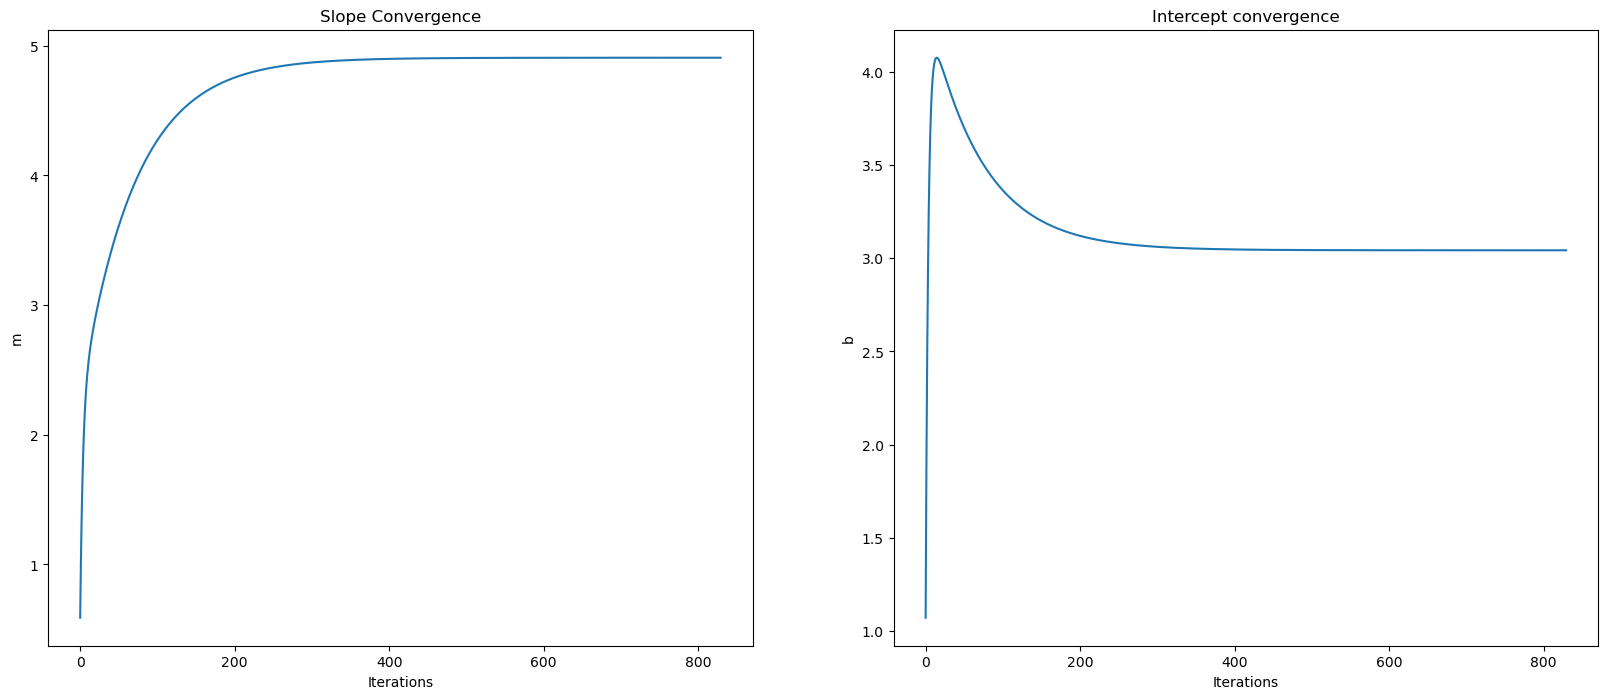

In [58]:
m = 0  # Slope
b = 0  # Intercept

# Hyperparameter
learning_rate = 0.1 

# small threshold to check for convergence
epsilon = 1e-12

# initialize previous cost as infinity
previous_mse = float("inf")

m, b = gradient_descent(x, y, m, b, learning_rate, epsilon)


print(f"Best slope: {m}")
print(f"Best intercept: {b}")

fig = plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.plot(range(iterations), ms)
plt.title("Slope Convergence")
plt.xlabel("Iterations")
plt.ylabel("m")

plt.subplot(1, 2, 2)
plt.plot(range(iterations), bs)
plt.title("Intercept convergence")
plt.xlabel("Iterations")
plt.ylabel("b")

plt.show()



From the results above we clearly see that the best slope and intercept converges at 4.90 and 3.04 respectively. Which is close to the line ($y=5x+3$) we choose to create our synthetic data. Now we can graph our best line prediction.

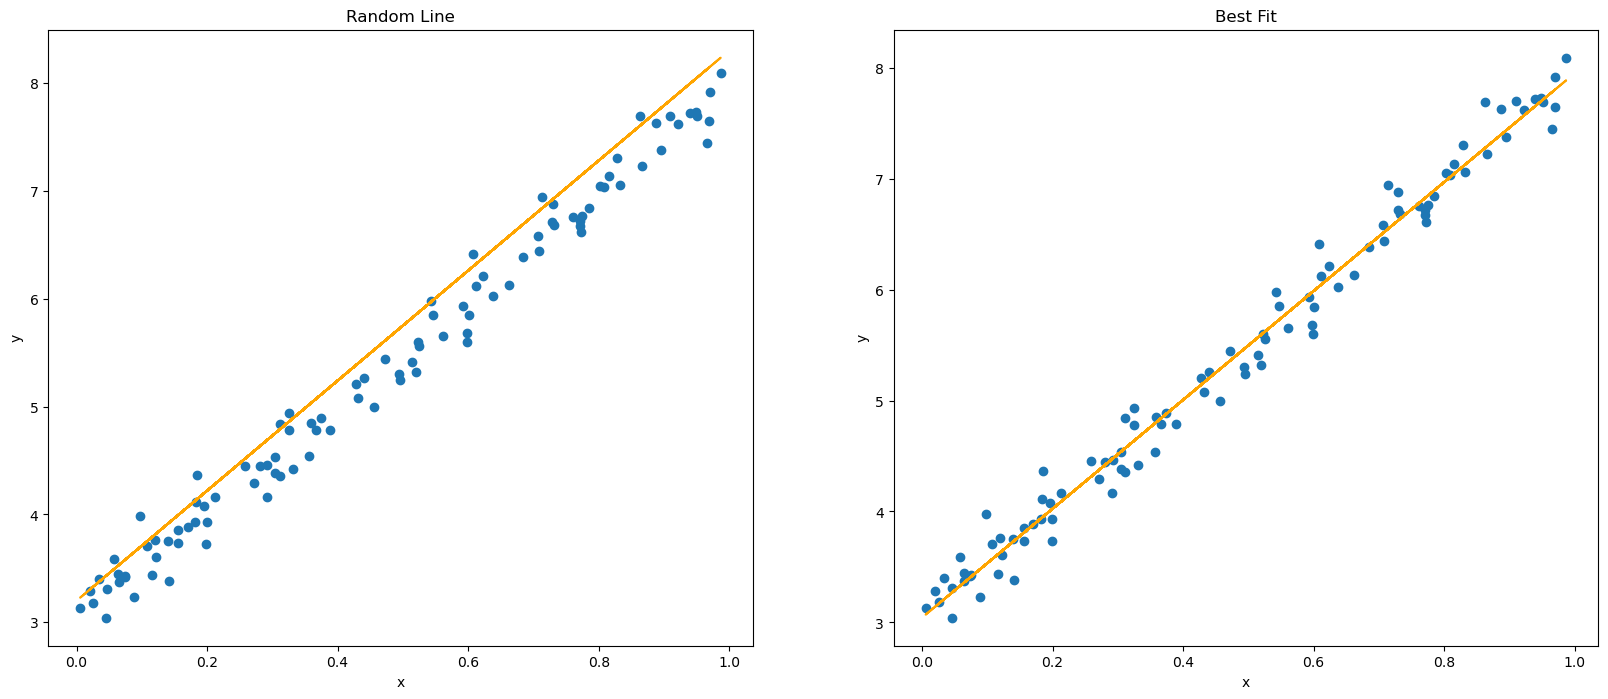

In [59]:
fig = plt.figure(figsize=(20, 8))

# First plot
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, ramdom_y, color="orange")
plt.title("Random Line")
plt.xlabel("x")
plt.ylabel("y")

# Second plot
plt.subplot(1, 2, 2) 
plt.scatter(x, y)
plt.plot(x, m * x + b, color="orange")
plt.title("Best Fit")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

## Step 7: Scikit-Learn

Luckily, we do not have to do this every time we want to use linear regression. We can use Python's scikit-learn library.

In [60]:
from sklearn.linear_model import LinearRegression


line_fitter = LinearRegression()
reshaped_x = x.reshape(-1, 1)
line_fitter.fit(reshaped_x, y)

print(f"Best slope: {line_fitter.coef_[0]}")
print(f"Best intercept: {line_fitter.intercept_}")

Best slope: 4.908045354575392
Best intercept: 3.04301923150935
